In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)


### Advantages
1.Easy To implement

2.There is less distortion in variance


### Disadvantage
1.Every situation randomness wont work

In [2]:
df=pd.read_csv('/Users/ashutoshsharma/Desktop/Python/datasets/titanic.csv',usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [3]:
df.age.isna().sum()

174

In [4]:
def impute_nan(data,variable):
    #median,random sampling
    data[variable+'_median'] = data[variable].fillna(data[variable].median())
    data[variable+'_random_sample'] = df[variable]
    random_sample = data[variable].dropna().sample(data[variable].isna().sum())
    random_sample.index = data[data[variable].isna()].index
    data.loc[data[variable+'_random_sample'].isnull(),variable+'_random_sample'] = random_sample
    
    
    
    
    

In [5]:
impute_nan(df,'age')

In [6]:
df.head()

,age,fare,survived,age_median,age_random_sample
0,NaN,7.7333,1,28.0,32.0
1,38.0,8.6625,0,38.0,38.0
2,30.0,24.1500,0,30.0,30.0
3,54.0,23.0000,1,54.0,54.0
4,40.0,13.0000,0,40.0,40.0


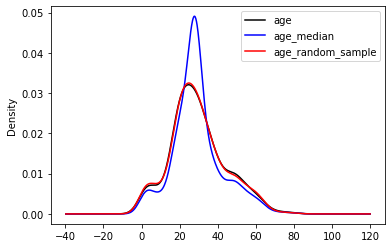

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde',color='black')
df['age_median'].plot(kind='kde',color='blue')
df['age_random_sample'].plot(kind='kde',color='red')
line,labels = ax.get_legend_handles_labels()
ax.legend(['age','age_median','age_random_sample'])

### Capturing NAN values with a new feature
It works well if the data are not missing completely at random

### Advantages
Easy to implement

Captures the importance of missing values


### Disadvantages
Creating Additional Features(Curse of Dimensionality)

In [8]:
df=pd.read_csv('/Users/ashutoshsharma/Desktop/Python/datasets/titanic.csv',usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [9]:
df['age_NAN'] = np.where(df.age.isna(),1,0)

In [10]:
df.age.fillna(df.age.mean(),inplace=True)

In [11]:
df.head()

,age,fare,survived,age_NAN
0,29.519847,7.7333,1,1
1,38.000000,8.6625,0,0
2,30.000000,24.1500,0,0
3,54.000000,23.0000,1,0
4,40.000000,13.0000,0,0


### End of Distribution imputation

#### it will lower the impact of outliers since missing values are filled with the distribution end value

In [12]:
df=pd.read_csv('/Users/ashutoshsharma/Desktop/Python/datasets/titanic.csv',usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


<AxesSubplot:>

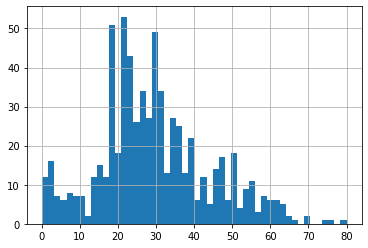

In [13]:
df.age.hist(bins=50)

In [14]:
extreme = df.age.mean() + 3 * df.age.std()

In [15]:
df['age_eod'] = df.age.fillna(extreme)

In [16]:
df.head()

,age,fare,survived,age_eod
0,NaN,7.7333,1,73.206577
1,38.0,8.6625,0,38.000000
2,30.0,24.1500,0,30.000000
3,54.0,23.0000,1,54.000000
4,40.0,13.0000,0,40.000000


<AxesSubplot:>

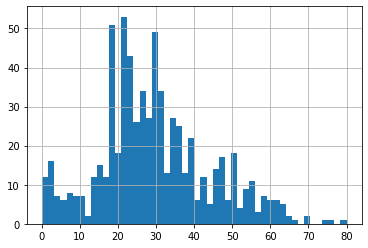

In [17]:
df.age.hist(bins=50)

<AxesSubplot:>

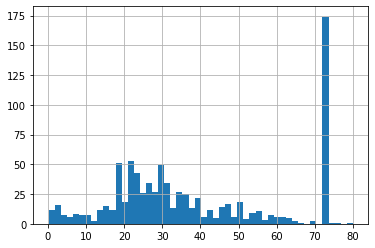

In [18]:
df.age_eod.hist(bins=50)

In [19]:
import seaborn as sns

/Users/ashutoshsharma/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

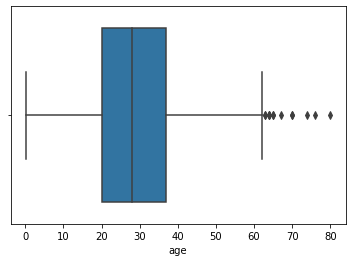

In [20]:
sns.boxplot(df['age'])

/Users/ashutoshsharma/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_eod'>

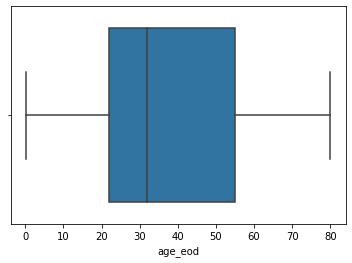

In [21]:
sns.boxplot(df['age_eod'])

### Arbitrary Value Imputation
this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [25]:
df=pd.read_csv('/Users/ashutoshsharma/Desktop/Python/datasets/titanic.csv',usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


<AxesSubplot:>

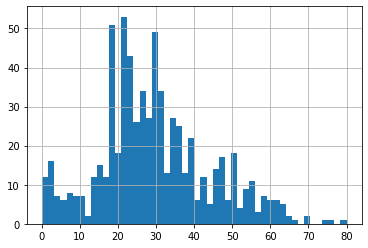

In [27]:
df.age.hist(bins=50)

In [28]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

In [29]:
impute_nan(df,'age')

<AxesSubplot:>

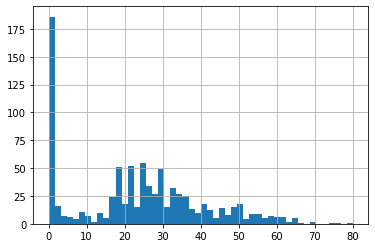

In [31]:
df.age_zero.hist(bins=50)

<AxesSubplot:>

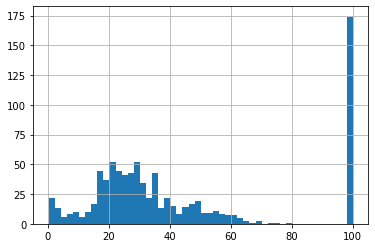

In [32]:
df.age_hundred.hist(bins=50)

### Advantages
1)Easy to implement

2)Captures the importance of missingess if there is one

Disadvantages

1)Distorts the original distribution of the variable

2)If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution

3)Hard to decide which value to use